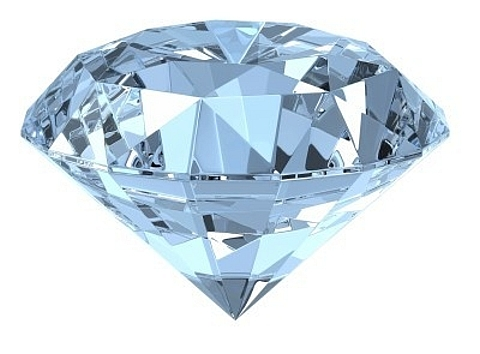

# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\yukar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importar arquivo CSV

In [2]:
diamonds = pd.read_csv('data.csv')
diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [3]:
diamonds_base = pd.read_csv('base.csv')
diamonds_base

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


# O DataFrame

## Os 4Cs
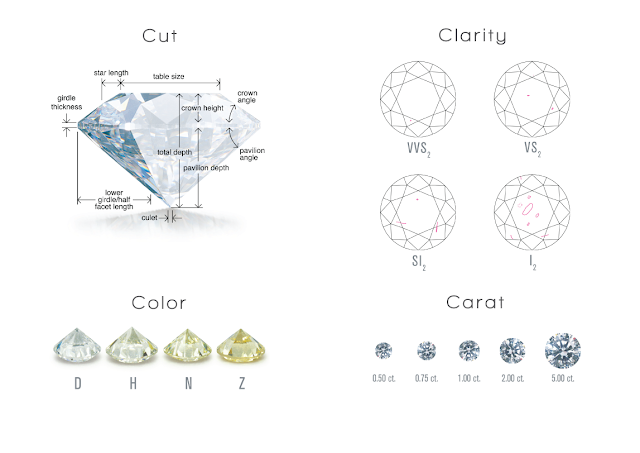

#### CARAT - PESO EM QUILATES
O quilate é uma unidade de medida de peso que representa 200 miligramas, ou 1/5 de uma grama.
Um diamante de 1 quilate pesa então 0,20 gramas.
O quilate se subdivide em 100 unidades chamadas PONTOS. Desta maneira, um diamante de 30 pontos possui 0,3 quilates dem peso.
Considerando-se o mesmo tipo de lapidação, por exemplo o Brilhante, quanto maior o peso ( quilate) maior será a pedra. 

#### COLOR - A COR DO DIAMANTES
Para facilitar a comunicação entre compradores e vendedores de diamantes o GIA criou o padrão de classificação de cores de diamantes que se inicia na letra D e termina na letra Z.
Quanto menos cor um diamante apresenta, maior sua classificação na escala.


#### CLARITY - A PUREZA DO DIAMANTE
A avaliaçã de pureza do diamantes é feita pelo profissional, utilizando a lupa de mão de 10X ou microscópio gemológico com lente de 10x.
A quantidade, tamanho, posição e natureza das imperfeições (jaça)  definem o grau de pureza do diamante. Um diamante classificado IF ( Internally Flawless - Internamente livre de inclusões) é considerado o mais puro.

#### CUT - O CORTE DO DIAMANTE
A classificação de Corte do diamante diz respeito a como o diamante foi cortado e lapidado.  Este classificação não deve ser confundida com o tipo de lapidação do diamante ( Brilhante, Navette, Oval, etc). 
O corte é o mais importante dos 4 Cs e diz respeito à qualidade de sua lapidação.  Uma lapidação bem feita garante ao diamante um brilho e fogo que o faz se diferenciar das outras gemas. 
A lapidação consiste em dois parâmetros muito diferentes: as proporções (ângulos e alturas) e o grau de acabamento (simetria e polimento), que traduzem, antes de qualquer coisa, o cuidado e a experiência com que a gema foi tratada no momento da lapidação.


### Verificar correlação entre as colunas

In [4]:
diamonds_base.corr().style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


The slope is:  7759.35277644046
The intercept is:  -2256.13169307385


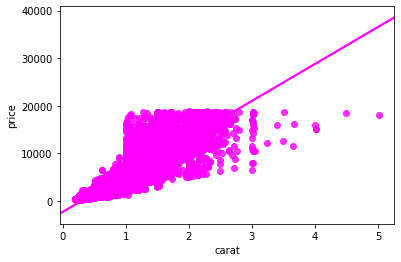

In [5]:
model = LinearRegression()
model.fit(diamonds_base[['carat']],diamonds_base['price'])
print ('The slope is: ' , str(model.coef_[0]))
print ('The intercept is: ' , str(model.intercept_))
sns.regplot(diamonds_base['carat'], diamonds_base['price'], color='magenta')

In [6]:
model.score(diamonds_base[['carat']],diamonds_base['price'])

0.8504268875149481

In [7]:
y_observed = diamonds_base['price']
y_predicted = model.predict(diamonds_base[['carat']])

In [8]:
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

1542.8464716474002

In [9]:
r2_score(y_observed, y_predicted)

0.850426887514948

In [10]:
model.fit(diamonds_base[['carat']],diamonds_base['price'])
model.score(diamonds_base[['carat']],diamonds_base['price'])

0.8504268875149481

### Categorizar os dados

In [11]:
diamonds_base['cut'] = diamonds_base['cut'].replace('Fair','2').replace('Ideal','4').replace('Very Good','6').replace('Good','8').replace('Premium','10')
diamonds_base['color'] = diamonds_base['color'].replace('D', '10').replace('E', '8.57').replace('F', '7.14').replace('G', '5.71').replace('H', '4.28').replace('I', '2.85').replace('J', '1.42')
diamonds_base['clarity'] = diamonds_base['clarity'].replace('IF', '10').replace('VVS1', '8.75').replace('VVS2', '7.5').replace('VS1', '6.25').replace('VS2', '5').replace('SI1', '3.75').replace('SI2', '2.5').replace('I1', '1.25')
diamonds_base['carat'] = diamonds_base['carat'].values.astype(np.float64)
diamonds_base['color'] = diamonds_base['color'].values.astype(np.float64)
diamonds_base['clarity'] = diamonds_base['clarity'].values.astype(np.float64)

In [12]:
diamonds_base = diamonds_base[diamonds_base['carat'].between(diamonds_base['carat'].quantile(.15), diamonds_base['carat'].quantile(.85))]

In [13]:
diamonds_base.corr().style.background_gradient(cmap='coolwarm')

,carat,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.158972,-0.291377,0.041767,0.174030,0.869019,0.985427,0.969399,0.934318
color,-0.158972,1.000000,-0.077757,-0.042135,-0.001110,0.002603,-0.145402,-0.141886,-0.142315
clarity,-0.291377,-0.077757,1.000000,-0.065296,-0.162416,0.015636,-0.294222,-0.281735,-0.281540
depth,0.041767,-0.042135,-0.065296,1.000000,-0.283283,-0.002633,-0.030358,-0.034054,0.131119
table,0.174030,-0.001110,-0.162416,-0.283283,1.000000,0.086860,0.184985,0.171796,0.122203
price,0.869019,0.002603,0.015636,-0.002633,0.086860,1.000000,0.846717,0.837237,0.799322
x,0.985427,-0.145402,-0.294222,-0.030358,0.184985,0.846717,1.000000,0.980732,0.935449
y,0.969399,-0.141886,-0.281735,-0.034054,0.171796,0.837237,0.980732,1.000000,0.922683
z,0.934318,-0.142315,-0.281540,0.131119,0.122203,0.799322,0.935449,0.922683,1.000000


In [14]:
diamonds_base.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,35939.000000,35939.000000,35939.000000,35939.000000,35939.000000,35939.000000,35939.000000,35939.000000,35939.000000
mean,0.705563,6.513512,5.028451,61.745235,57.404371,2999.391803,5.601986,5.606148,3.459909
std,0.285058,2.357737,2.010538,1.431928,2.230689,2317.890823,0.785498,0.792737,0.511666
min,0.320000,1.420000,1.250000,43.000000,43.000000,345.000000,0.000000,0.000000,0.000000
25%,0.420000,4.280000,3.750000,61.000000,56.000000,1094.000000,4.830000,4.840000,2.990000
50%,0.700000,7.140000,5.000000,61.800000,57.000000,2317.000000,5.660000,5.670000,3.500000
75%,1.000000,8.570000,6.250000,62.500000,59.000000,4346.500000,6.360000,6.360000,3.940000
max,1.240000,10.000000,10.000000,79.000000,79.000000,18231.000000,7.270000,31.800000,31.800000


### Verificar melhoramentos

In [15]:
X = diamonds_base[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']]
y = diamonds_base['price']
model.fit(X, y)
model.coef_

array([ 1.18622988e+04,  8.43076524e+00,  3.53660994e+02,  1.84677585e+02,
       -1.02174327e+02, -5.48916027e+01, -1.34840254e+03, -2.58789369e+01,
       -3.97077464e+00])

In [16]:
y_observed = diamonds_base['price']
y_predicted = model.predict(diamonds_base[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']])

In [17]:
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

822.5529309156736

In [18]:
r2_score(y_observed, y_predicted)

0.8740628558149361

In [19]:
model = LinearRegression()
model.fit(X,y)

print ('The slope is: ' , str(model.coef_[0])) 
print ('The intercept is: ' , str(model.intercept_)) #Valor de y quando x=0

The slope is:  11862.298839558103
The intercept is:  8768.46134653695


### Como está ?

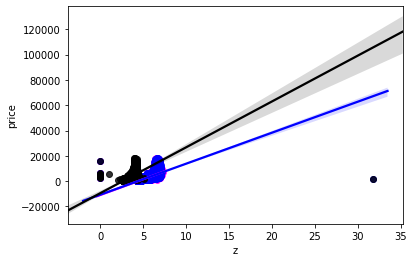

In [20]:
sns.regplot(diamonds_base['x'], diamonds_base['price'], color='magenta')
sns.regplot(diamonds_base['y'], diamonds_base['price'], color='blue')
sns.regplot(diamonds_base['z'], diamonds_base['price'], color='k')

### Melhorar mais !

In [21]:
diamonds_base = diamonds_base[diamonds_base['z'].between(diamonds_base['z'].quantile(.25), diamonds_base['z'].quantile(.75))]

In [22]:
X = diamonds_base[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']]
y = diamonds_base['price']
model.fit(X, y)
model.coef_

array([ 1.24584862e+04, -1.39071835e-01,  2.52637932e+02,  1.42522972e+02,
        4.86402859e+01, -4.12615342e+01, -9.61678460e+02,  9.23156947e+02,
       -2.92316162e+03])

In [23]:
y_observed = diamonds_base['price']
y_predicted = model.predict(diamonds_base[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']])
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

478.071217214617

In [24]:
r2_score(y_observed, y_predicted)

0.872978698941888

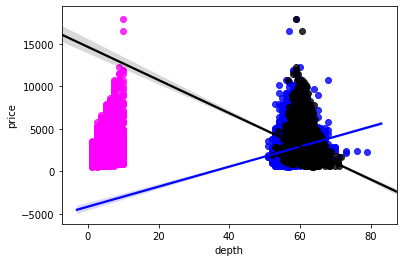

In [25]:
sns.regplot(diamonds_base['clarity'], diamonds_base['price'], color='magenta')
sns.regplot(diamonds_base['table'], diamonds_base['price'], color='blue')
sns.regplot(diamonds_base['depth'], diamonds_base['price'], color='k')

In [26]:
diamonds_base = diamonds_base[diamonds_base['depth'].between(diamonds_base['depth'].quantile(.25), diamonds_base['depth'].quantile(.75))]
diamonds_base = diamonds_base[diamonds_base['clarity'].between(diamonds_base['clarity'].quantile(.25), diamonds_base['clarity'].quantile(.75))]
diamonds_base = diamonds_base[diamonds_base['table'].between(diamonds_base['table'].quantile(.25), diamonds_base['table'].quantile(.75))]
diamonds_base = diamonds_base[diamonds_base['color'].between(diamonds_base['color'].quantile(.25), diamonds_base['color'].quantile(.75))]
diamonds_base = diamonds_base[diamonds_base['price'].between(diamonds_base['price'].quantile(.25), diamonds_base['price'].quantile(.75))]

In [27]:
X = diamonds_base[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']]
y = diamonds_base['price']
model.fit(X, y)
model.coef_

array([ 7785.66154961,    -9.72803907,   138.65314996,    60.63306631,
         140.14985273,    -8.56453479,  1043.13863384,   565.36125383,
       -3861.62883632])

In [28]:
y_observed = diamonds_base['price']
y_predicted = model.predict(diamonds_base[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']])
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

182.00148496703397

In [29]:
r2_score(y_observed, y_predicted)

0.8461773248495699

In [30]:
diamonds_base.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.633360,7.344083,4.971506,61.712884,56.798513,2261.962339,5.503726,5.509386,3.398157
std,0.090458,1.158388,0.985444,0.457708,0.774653,464.280099,0.258163,0.264490,0.164218
min,0.460000,5.710000,3.750000,60.900000,56.000000,1669.000000,4.950000,5.000000,3.070000
25%,0.550000,5.710000,3.750000,61.300000,56.000000,1813.000000,5.270000,5.270000,3.240000
50%,0.630000,7.140000,5.000000,61.700000,57.000000,2196.000000,5.500000,5.510000,3.390000
75%,0.710000,8.570000,6.250000,62.100000,57.000000,2700.000000,5.730000,5.740000,3.540000
max,0.830000,8.570000,6.250000,62.500000,58.000000,3116.000000,6.050000,6.080000,3.760000


In [31]:
diamonds_base.corr().style.background_gradient(cmap='coolwarm')

,carat,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.184312,-0.529923,0.146385,0.133208,0.881569,0.989844,0.988047,0.993997
color,-0.184312,1.000000,-0.097429,-0.086305,-0.006776,-0.072362,-0.177213,-0.177534,-0.186923
clarity,-0.529923,-0.097429,1.000000,0.001640,-0.065359,-0.291137,-0.532357,-0.523666,-0.518113
depth,0.146385,-0.086305,0.001640,1.000000,0.014016,0.109468,0.064291,0.059904,0.214122
table,0.133208,-0.006776,-0.065359,0.014016,1.000000,0.092959,0.111816,0.104505,0.109010
price,0.881569,-0.072362,-0.291137,0.109468,0.092959,1.000000,0.872991,0.871356,0.873593
x,0.989844,-0.177213,-0.532357,0.064291,0.111816,0.872991,1.000000,0.985106,0.984650
y,0.988047,-0.177534,-0.523666,0.059904,0.104505,0.871356,0.985106,1.000000,0.984255
z,0.993997,-0.186923,-0.518113,0.214122,0.109010,0.873593,0.984650,0.984255,1.000000


### Aplicar no arquivo do Rick

In [32]:
diamonds['cut'] = diamonds['cut'].replace('Fair','2').replace('Ideal','4').replace('Very Good','6').replace('Good','8').replace('Premium','10')
diamonds['color'] = diamonds['color'].replace('D', '10').replace('E', '8.57').replace('F', '7.14').replace('G', '5.71').replace('H', '4.28').replace('I', '2.85').replace('J', '1.42')
diamonds['clarity'] = diamonds['clarity'].replace('IF', '10').replace('VVS1', '8.75').replace('VVS2', '7.5').replace('VS1', '6.25').replace('VS2', '5').replace('SI1', '3.75').replace('SI2', '2.5').replace('I1', '1.25')

In [33]:
diamonds['carat'] = diamonds['carat'].values.astype(np.float64)
diamonds['color'] = diamonds['color'].values.astype(np.float64)
diamonds['clarity'] = diamonds['clarity'].values.astype(np.float64)

In [34]:
model.fit(X,y)
diamonds['price_predicted'] = model.predict(diamonds[['carat','cut','clarity', 'color','depth', 'table', 'x', 'y', 'z']])

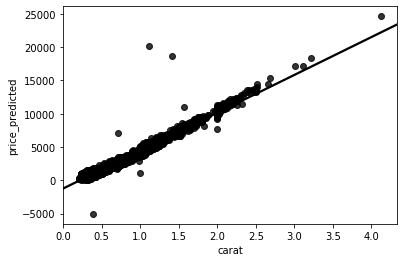

In [35]:
sns.regplot(diamonds['carat'], diamonds['price_predicted'], color='k')

In [36]:
diamonds.query('price_predicted <= 0')

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
323,0.39,10,4.28,2.5,61.2,58.0,4.51,6.02,4.44,-5058.096026


In [37]:
diamonds.describe()

,carat,color,clarity,depth,table,x,y,z,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,6.269988,5.009500,61.724680,57.516140,5.735516,5.736410,3.539576,3304.649147
std,0.472936,2.450119,2.077745,1.457691,2.244019,1.120300,1.110345,0.694733,2734.107450
min,0.200000,1.420000,1.250000,44.000000,50.000000,0.000000,0.000000,0.000000,-5058.096026
25%,0.400000,4.280000,3.750000,61.000000,56.000000,4.720000,4.720000,2.910000,1154.350733
50%,0.710000,5.710000,5.000000,61.800000,57.000000,5.710000,5.720000,3.530000,2545.046649
75%,1.040000,8.570000,6.250000,62.500000,59.000000,6.530000,6.520000,4.032500,4583.708927
max,4.130000,10.000000,10.000000,73.600000,70.000000,10.000000,9.850000,6.430000,24651.155227


In [38]:
diamonds.to_csv('rick.csv')